In [1]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [164]:
d = pd.read_csv('data/data_many.csv')
d.head()

,timestamps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Marker
0,1.488935e+09,-12494.062,31.383,31.871,35.222,0
1,1.488935e+09,-12565.521,18.829,39.432,23.128,0
2,1.488935e+09,-12509.839,21.112,32.225,33.070,0
3,1.488935e+09,-12430.331,46.934,19.734,49.180,0
4,1.488935e+09,-12488.146,27.412,27.025,23.625,0


In [165]:
X = np.array(d.ix[:, 1:5])
sig = X[:, 0]

In [180]:
freq, y = signal.welch(sig, fs=200.0)
plt.plot(freq, np.log(y))

In [171]:
b, a = signal.butter(8, (6.5/100.0, 40.0/100), btype='bandpass')
sig_f = signal.lfilter(b, a, sig)[1000:]

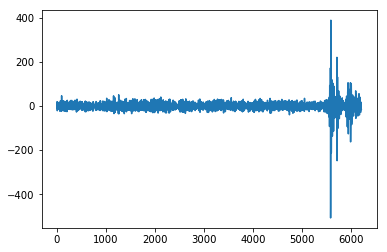

In [187]:
plt.plot(sig_f)


(5, 40)

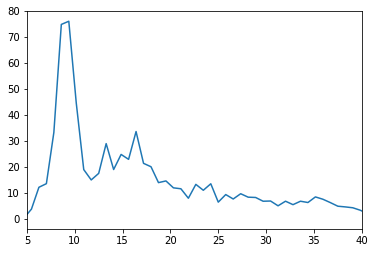

In [188]:
fftfreq, fft = signal.welch(sig_f, fs=200.0)
plt.plot(fftfreq, fft)
plt.xlim(5, 40)

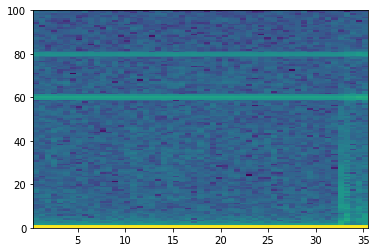

In [192]:
_ = plt.specgram(sig, Fs=200.0)

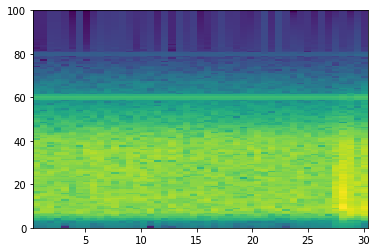

In [193]:
_ = plt.specgram(sig_f, Fs=200.0, NFFT=256, noverlap=128)